# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#query url
query_url = f'{url}appid={weather_api_key}&q='


city_names =[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

count = 1

for city in cities:
    try:
        response = requests.get(query_url + city +'&units=imperial').json()

        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City #{count}: {response['name']}")
        count = count + 1

    except:
        print(f'#{count}: {city} not found.\n')
        count = count + 1



City #1: Puerto Ayora
City #2: Yulara
City #3: Chui
City #4: Bredasdorp
City #5: Turaif
City #6: Ushuaia
City #7: Tasiilaq
City #8: Nikolayevsk-on-Amur
City #9: Atuona
City #10: Lata
City #11: Hambantota
City #12: Jalu
City #13: Albany
City #14: Tigil'
City #15: Yellowknife
City #16: Hithadhoo
#17: tsihombe not found.

City #18: Airai
City #19: Tazovsky
City #20: Hermanus
#21: rungata not found.

City #22: Pec
City #23: Muhos
City #24: Faanui
City #25: Sola
#26: taolanaro not found.

City #27: Mount Gambier
City #28: Upernavik
City #29: Pevek
City #30: Ilulissat
City #31: Álamos
#32: karaul not found.

City #33: Río Gallegos
City #34: Kahului
City #35: Berlevåg
City #36: Carnarvon
City #37: Kostomuksha
City #38: Alice Springs
City #39: Barrow
City #40: Shimoda
City #41: Arcata
City #42: Lagoa
City #43: Ponta do Sol
City #44: Alofi
City #45: Grand Gaube
City #46: Nadym
City #47: Provideniya
City #48: Marawi
City #49: Punta Arenas
City #50: Broome
City #51: Olafsvik
City #52: Springfield

City #394: Kholtoson
City #395: Hamilton
City #396: Jérémie
City #397: Topolobampo
City #398: Kottayam
City #399: Livingston
City #400: Tashara
City #401: Abu Samrah
City #402: Bichena
City #403: Naranjal
City #404: Sambava
City #405: La Seyne-sur-Mer
City #406: Daşoguz
City #407: Novoagansk
City #408: Dali
#409: palabuhanratu not found.

City #410: Evensk
#411: saleaula not found.

City #412: Lockhart
City #413: San Roque
City #414: Vacha
#415: utiroa not found.

City #416: Linxia Chengguanzhen
City #417: Berezovyy
City #418: Avera
City #419: Kautokeino
City #420: Brae
City #421: Saint-Joseph
City #422: Chennai
City #423: Podhum
City #424: Pemangkat
City #425: Botevgrad
City #426: Nouakchott
City #427: Colac
City #428: Golyshmanovo
#429: umm durman not found.

City #430: ‘Ewa Beach
City #431: Vitim
City #432: Vorsma
City #433: Mazamari
City #434: Atambua
City #435: Umeå
City #436: Hobyo
City #437: Chapais
#438: kamenskoye not found.

City #439: Nurota
City #440: Fort Nelson
City #441:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City': city_names,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,68.00,83,40,9.24,EC,1632191084
1,Yulara,-25.2406,130.9889,60.64,29,6,17.27,AU,1632191279
2,Chui,-33.6971,-53.4616,54.43,88,84,16.78,UY,1632191104
3,Bredasdorp,-34.5322,20.0403,45.72,87,15,2.30,ZA,1632191109
4,Turaif,31.6725,38.6637,68.25,42,0,8.05,SA,1632191613


In [5]:
def firstq(ser):
    return ser.quantile(.25)

def secondq(ser):
    return ser.quantile(.75)

summary_df = weather_df.agg(['count','mean','std','min',firstq, 'median', secondq, 'max'])[['Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


summary_df


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
min,-54.800000,-179.166700,12.670000,9.000000,0.000000,0.000000,1.632191e+09
max,78.218600,178.416700,96.690000,100.000000,100.000000,30.890000,1.632192e+09
mean,20.143657,16.374958,63.949109,70.269091,52.478182,8.503182,1.632192e+09
std,33.302771,91.928322,16.836981,20.291149,40.453604,5.783306,2.771595e+02
firstq,-5.920575,-68.572175,51.592500,58.000000,7.250000,4.055000,1.632191e+09
median,22.684450,24.824150,67.490000,74.000000,55.500000,7.345000,1.632192e+09
secondq,47.939500,99.933575,78.667500,86.000000,96.000000,11.540000,1.632192e+09


In [6]:
weather_df.to_csv('weatherdata.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
len(weather_df)

550

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_series = weather_df[weather_df['Humidity'] > 100].index
index_series

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(index_series)
len(weather_df)

550

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

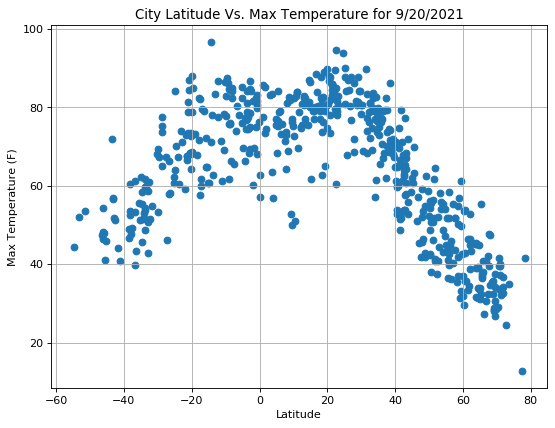

In [10]:
d = time.localtime()
date =(f"{d.tm_mon}/{d.tm_mday}/{d.tm_year}")

x = weather_df['Lat']

y = weather_df['Max Temp']


plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude Vs. Max Temperature for {date}")

plt.savefig('Latitude_vs_Temperature_Plot.png')
plt.show()


# Observation
* Cities with latitudes closer to 0, meaning closer to the equator, have higher Maximum Temperatures.

## Latitude vs. Humidity Plot

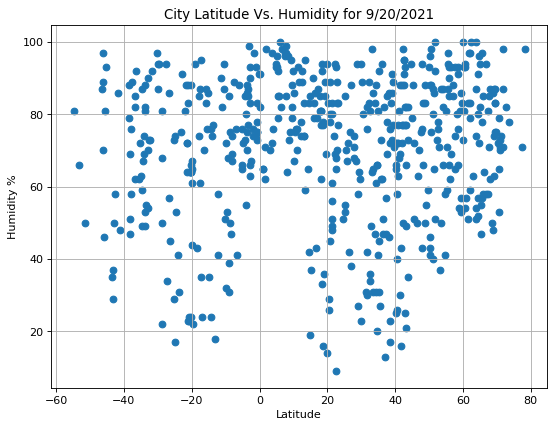

In [11]:
x = weather_df['Lat']

y = weather_df['Humidity']

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude Vs. Humidity for {date}")

plt.savefig('Latitude_vs_Humidity_Plot.png')
plt.show()

# Observation
* Cities with latitudes closer to the equator are more likely to have higher humidity.

## Latitude vs. Cloudiness Plot

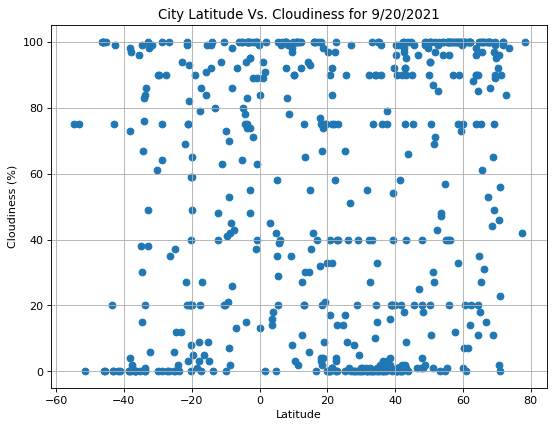

In [12]:
x = weather_df['Lat']

y = weather_df['Cloudiness']

plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs. Cloudiness for {date}")

plt.savefig('Latitude_vs_Cloudiness_Plot.png')
plt.show()

# Observation
* Many cities close to the equator are more likely to have high cloudiness percentages. 

## Latitude vs. Wind Speed Plot

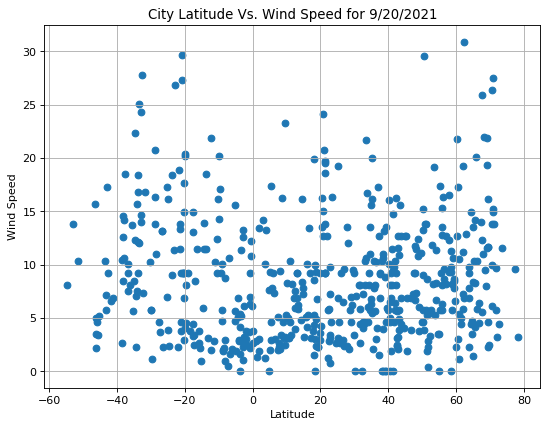

In [13]:
x = weather_df['Lat']

y = weather_df['Wind Speed']

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude Vs. Wind Speed for {date}")

plt.savefig('Latitude_vs_WindSpeed_Plot.png')
plt.show()

# Observation
* Cities near the euqator have lower wind speeds than cities in the northern and southern hemispheres

## Linear Regression

In [14]:
# northern hemisphere latitudes are positive
north_df = weather_df[weather_df['Lat'] >= 0]

south_df = weather_df[weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.833283876775367


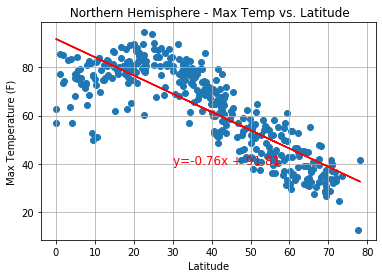

In [15]:
x = north_df['Lat']
y = north_df['Max Temp']

plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Northern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7685022318546071


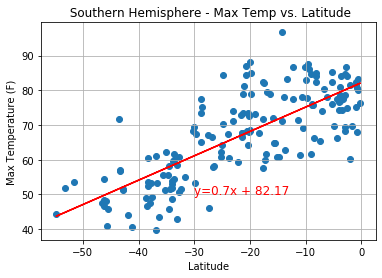

In [16]:
x = south_df['Lat']
y = south_df['Max Temp']

plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Southern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,50),fontsize=12,color="red")

plt.savefig('SouthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.004340752359441443


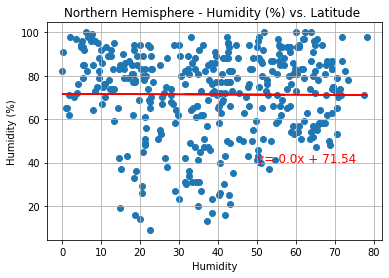

In [17]:
x = north_df['Lat']
y = north_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(50,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Humidity and latitiude in the northen hemisphere seem to have an minor affect on each other, or possibly no affect at all. The linear regression here shows that the humidity and distance from the equator are positively correlated though, which means that as the cities get closer to the north pole, the humidity increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09569225449650035


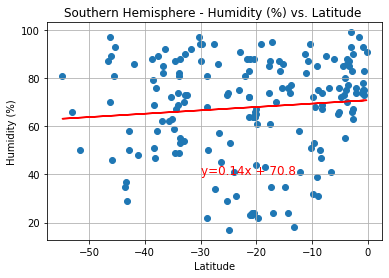

In [18]:
x = south_df['Lat']
y = south_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Humidity and latitiude in the southern hemisphere seem to have an minor affect on each other, or possibly no affect at all. The linear regression here shows that the humidity and distance from the south pole are positively correlated though, which means that as the cities get closer to the equator, the humidity increases. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18476623603784909


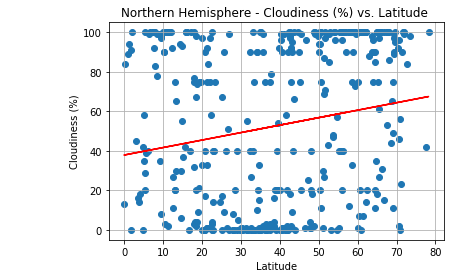

In [19]:
x = north_df['Lat']
y = north_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the north pole are more cloudy than cities closer to the equator. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.257655805131711


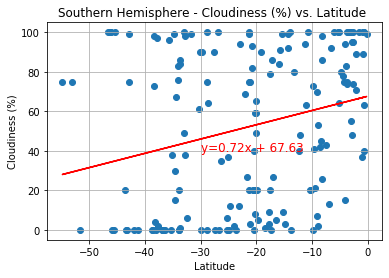

In [20]:
x = south_df['Lat']
y = south_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are more cloudy than cities closer to the south pole. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2070515842339777


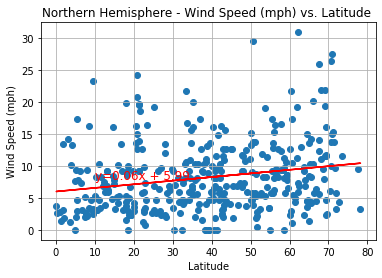

In [21]:
x = north_df['Lat']
y = north_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('NorthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are less windy than cities closer to the north pole. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2547930712730116


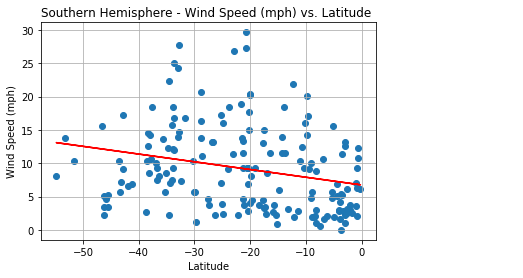

In [22]:
x = south_df['Lat']
y = south_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('SouthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

# Observation
* Cities near the equator are less windy than cities closer to the south pole. 